<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#045F5F"> <b>Deep Learning (Fall 2023)</b><br><br><b>Homework-1</i><br><br><h1><h3>Madaline & Adaline-Q2</i></font></h3>
                </td>
                <td style="border: none!important;">
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>
    
</div>
<br>
<font size=3 color="#045F5F">Mohammad Javad Ranjbar<br></font><br>
<font size=3 color="#045F5F">Behrad Mosaie<br></font><br>

# Required Libraries
In this code cell, we import essential libraries for our machine learning project. These libraries include scikit-learn, Matplotlib, and NumPy. Scikit-learn provides datasets and tools for machine learning, Matplotlib allows us to create visualizations, and NumPy is used for numerical computations. Additionally, we import specific functions and classes like "train_test_split" for data splitting and "make_moons" for generating a synthetic dataset. The "StandardScaler" from scikit-learn's preprocessing module will help us standardize our data. Running this cell is crucial for setting up the environment and making the subsequent code cells functional.






In [65]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1-2. Adaline

## A
Here's a text cell related to the code you provided:

### Data Visualization: Iris Sepal Width vs Sepal Length
In this code cell, we perform data visualization to explore the relationship between sepal width and sepal length for different species of iris flowers. Here's a breakdown of the steps:

**Step 1:** We load the Iris dataset using scikit-learn's `datasets.load_iris()` function. This dataset contains information about three different species of iris flowers, making it a popular choice for classification tasks. We extract the data and target labels, which will be used in the visualization.

**Step 2:** We extract the sepal width and sepal length from the dataset. Sepal width corresponds to feature 1, and sepal length corresponds to feature 0 in the dataset.

**Step 3:** Using Matplotlib, we create a scatter plot to visualize the sepal width against sepal length. We differentiate the data points for the three different species (Setosa, Versicolor, and Virginica) by using custom colors and labels. The legend is included to help identify each species.

The resulting plot provides insights into the sepal characteristics of iris flowers and how they vary across different species. This visualization is a crucial step in understanding the data before building a machine learning model for iris flower classification.

<ipython-input-66-081be1f3450a>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sepal_length[target == i], sepal_width[target == i], c=colors[i], label=class_labels[i], cmap=plt.cm.Set1, edgecolor='k')


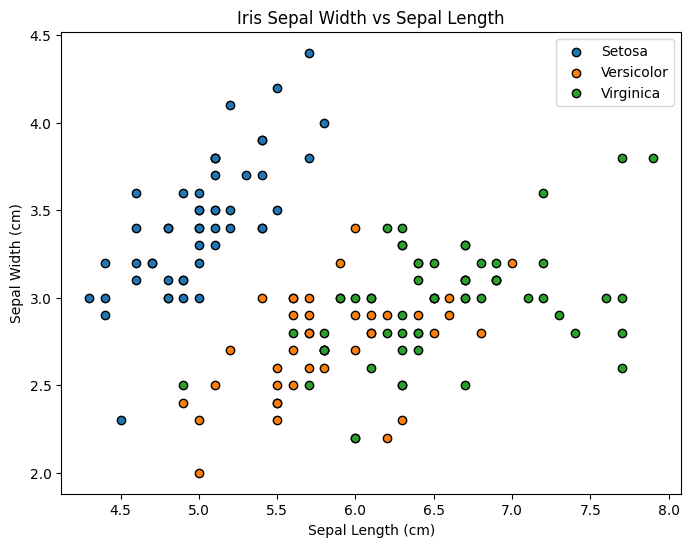

In [66]:


# Step 1: Load the Iris dataset
iris = datasets.load_iris()
data = iris.data
target = iris.target

# Step 2: Extract sepal width (feature 1) and sepal length (feature 0)
sepal_width = data[:, 1]
sepal_length = data[:, 0]

# Define class labels and colors for the legend
class_labels = ['Setosa', 'Versicolor', 'Virginica']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Custom colors

# Step 3: Create a scatter plot with a legend
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(sepal_length[target == i], sepal_width[target == i], c=colors[i], label=class_labels[i], cmap=plt.cm.Set1, edgecolor='k')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Sepal Width vs Sepal Length')
plt.legend()
plt.show()


### Adaline Class for Adaptive Linear Neuron
The code cell defines a class called "Adaline," which stands for Adaptive Linear Neuron. This class is used for implementing a simple neural network model with adjustable weights and biases. Here's an overview of the class and its methods:

__init__(self, input_size, activation_function): This is the class constructor method. It initializes the Adaline model with random weights, zero biases, and other necessary attributes. It takes two arguments: input_size, which specifies the number of input features, and activation_function, which is the activation function used in the model.

fit(self, X, Y, epochs, lr, error_func, val_split=0.1): This method is used to train the Adaline model. It takes as input the training data X and corresponding labels Y, the number of training epochs, learning rate lr, an error function to calculate the model's loss, and an optional validation split percentage val_split. During training, the method performs forward and backward passes, tracks training and validation accuracy, and stores this information in the self.history dictionary.

predict(self, X): This method is used to make predictions on new data. It takes the input data X and returns the model's predictions.

evaluate(self, X, Y): This method calculates the accuracy of the model's predictions on a given dataset. It takes the input data X and the corresponding labels Y, computes the accuracy, and returns the result.

forward(self, X): This method computes the forward pass of the Adaline model. It takes input data X, performs a linear combination of the inputs with the model's weights, adds the biases, and applies the activation function. The result is returned as the model's output.

backward(self, X, Y, outputs): This method handles the backward pass of the model. It calculates the error (the difference between the true labels Y and the model's outputs), updates the weights and biases using gradient descent with the provided learning rate lr.

The Adaline class is a simple implementation of an adaptive linear neuron model and can be used for binary classification tasks. It is capable of training on a dataset, making predictions, and evaluating its performance.

In [74]:
from IPython.core import history
class Adaline():
  def __init__(self,input_size,activation_function):
    self.weights = np.random.rand(input_size)  # Initialize weights randomly
    self.biases = 0
    self.lr=None
    self.history={"train_acc":[],"train_loss":[],"val_acc":[],"val_loss":[]}
    self.activation_function=activation_function
  def fit(self, X, Y, epochs, lr, error_func,val_split=0.1):

    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_split)
    self.lr = lr
    for epoch in range(epochs):
        outputs = self.forward(X_train)
        self.backward(X_train, Y_train, outputs)

        accuracy = self.evaluate(X_train, Y_train)
        error = error_func(Y_train, outputs)
        self.history["train_loss"].append(np.mean(error))
        self.history["train_acc"].append(accuracy)

        outputs = self.forward(X_val)
        accuracy = self.evaluate(X_val, Y_val)
        error = error_func(Y_val, outputs)
        self.history["val_loss"].append(np.mean(error))
        self.history["val_acc"].append(accuracy)

    return self.history
  def predict(self,X):
    y=self.forward(X)
    return y
  def evaluate(self, X, Y):
    predictions = self.predict(X)
    accuracy = np.mean(predictions == Y)
    return accuracy
  def forward(self,X):
    out1=np.dot(X,self.weights)+ self.biases
    y=self.activation_function(out1)
    return y
  def backward(self, X, Y, outputs):
    delta = Y - outputs
    self.weights += self.lr * np.dot(X.T, delta)
    self.biases += self.lr * np.sum(delta)
def step_activation(x):
    return np.where(x >= 0, 1,-1)

# Define the mean squared error as the error function
def mean_squared_error(y_true, y_pred):
    return 1/2*(y_true - y_pred) ** 2

### Training and Evaluating an Adaline Model on the Iris Dataset
In this code cell, we perform the following steps:

Loading the Iris Dataset: We load the Iris dataset using scikit-learn's datasets.load_iris() function. The dataset contains features and labels for three different species of iris flowers.

Data Preprocessing: We scale the features in the dataset using the StandardScaler to ensure that they have a mean of 0 and a standard deviation of 1. Additionally, we modify the target labels to create a binary classification problem. We set the label to 1 if the iris species is "Setosa" (class 0) and 0 for the other species. We also reduce the feature dimensionality to 2 for visualization purposes.

Data Splitting: We split the preprocessed dataset into training and testing sets using the train_test_split function. The training set will be used to train the Adaline model, and the testing set will be used to evaluate its performance.

Adaline Model Initialization: We create an instance of the "Adaline" class, specifying the input size and an activation function (assuming you have defined "step_activation" elsewhere in your code).

Model Training: We train the Adaline model by specifying the number of training epochs (100) and the learning rate (0.01). The training data, learning rate, and an error function are passed to the "fit" method, which updates the model's weights and biases.

Model Evaluation: After training, we evaluate the model's performance on both the training and testing sets. We calculate and print the training and testing accuracies to assess how well the Adaline model has learned to classify iris flowers.

In [75]:


iris = datasets.load_iris()
X = iris.data
Y = iris.target
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X = scaler.fit_transform(X)
#Y = (Y == 0).astype(int)  # Setosa (class 0) against other classes
Y = np.where(Y == 0, -1, 1)
X = X[:, :2]
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an instance of the Adaline class
input_size = X.shape[1]
adaline = Adaline(input_size=input_size, activation_function=step_activation)

# Train the Adaline model
epochs = 100
learning_rate = 0.01
history=adaline.fit(X_train, Y_train, epochs, learning_rate, error_func=mean_squared_error)

# Evaluate the model
train_accuracy = adaline.evaluate(X_train, Y_train)
test_accuracy = adaline.evaluate(X_test, Y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 1.0


### Visualizing Training History
In this code cell, we visualize the training history of the Adaline model on the Iris dataset. The training history includes two key aspects: accuracy and loss. The code performs the following tasks:

Creating Subplots: We create a figure with two subplots side by side. The left subplot is dedicated to plotting training and validation accuracy, while the right subplot is for training and validation loss.

Plotting Training Accuracy and Validation Accuracy: In the left subplot, we plot the training accuracy and validation accuracy over epochs. The x-axis represents the number of training epochs, and the y-axis represents the accuracy values. Training accuracy is indicated by the blue line, and validation accuracy is shown in orange. These plots allow us to observe how the accuracy of the model changes during training and whether it overfits or generalizes well.

Plotting Training Loss and Validation Loss: In the right subplot, we plot the training loss and validation loss over epochs. Similar to the accuracy plots, the x-axis represents the number of training epochs, and the y-axis represents the loss values. Training loss is represented by the blue line, and validation loss is shown in orange. Monitoring loss is crucial for understanding how well the model is converging during training and whether it is underfitting or overfitting.

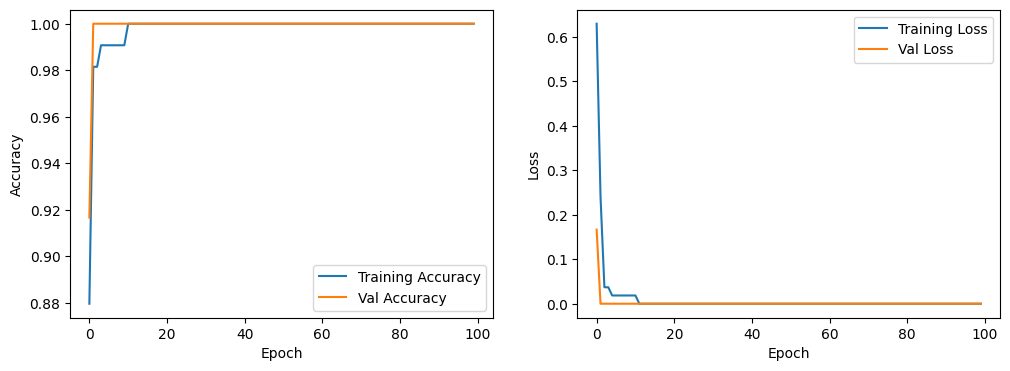

In [76]:
# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history["train_acc"], label='Training Accuracy')
plt.plot(history["val_acc"], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["train_loss"], label='Training Loss')
plt.plot(history["val_loss"], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Visualizing Decision Boundary of Perceptron
In this code cell, we create a scatter plot and decision boundary to visualize how a trained Perceptron model classifies the data. The code performs the following tasks:

Scatter Plot for Setosa and Other Species: We create a scatter plot to visualize the training data points. Data points belonging to the "Setosa" class (class 0) are shown in red, while data points belonging to other species (classes 1 and 2) are shown in blue. This helps us see the distribution of the two classes in the feature space.

Creating a Meshgrid for Decision Boundary: We create a meshgrid to define the range of feature values for which we want to visualize the decision boundary. This meshgrid covers the entire range of feature values for the two features used in the Adaline model.

Predicting Class Labels for Meshgrid Points: We use the trained Adaline model (adaline) to predict class labels for the points on the meshgrid. This allows us to determine how the model classifies data points across the entire feature space.

Contour Plot for Decision Boundary: We use a contour plot to display the decision boundary of the Perceptron model. The contour lines separate the regions where the model predicts different classes. The decision boundary helps us understand how the model distinguishes between different species based on the features.

Axis Labels, Legend, and Title: We add labels to the x and y axes to identify the features being visualized. A legend is included to indicate the classes, and a title is provided to describe the plot's content.

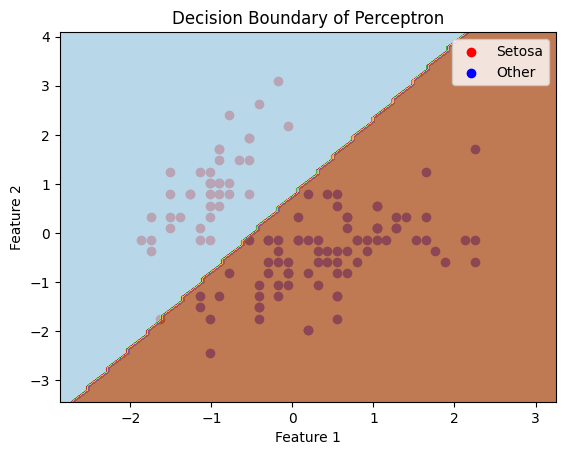

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Scatter plot for Setosa (class 0)
plt.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], label='Setosa', c='red')

# Scatter plot for Versicolor and Virginica (class 1 and 2)
plt.scatter(X_train[Y_train != -1][:, 0], X_train[Y_train != -1][:, 1], label='Other', c='blue')

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100))

# Use the trained Perceptron model to predict
Z = adaline.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Contour plot to show the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary of Perceptron')
plt.show()

## B

### Binary Classification of "Versicolour" vs. Others
In this code, we perform binary classification to distinguish the "Versicolour" class (class 1) from the other classes in the Iris dataset. The following steps are taken:

Loading and Preprocessing the Iris Dataset: We start by loading the Iris dataset, standardizing the features using StandardScaler, and then transforming it. For this binary classification task, our goal is to identify "Versicolour" (class 1) flowers while treating all other classes as a single combined class.

Data Splitting: The dataset is split into two subsets: a training set and a testing set. The training set is used to train the Adaline model, and the testing set is used to evaluate its performance.

Adaline Model Initialization: We create an instance of the "Adaline" class, specifying the input size and using the "step_activation" function for the activation function.

Model Training: The Adaline model is trained with 100 epochs and a learning rate of 0.01. During training, we use a mean squared error function to update the model's parameters. The training history, including loss and accuracy, is stored in the "history" variable.

Model Evaluation: We assess the model's performance by calculating and displaying the training and testing accuracies. These accuracy values indicate how effectively the model distinguishes the "Versicolour" class from the other combined classes.

In [85]:

iris = datasets.load_iris()
X = iris.data
Y = iris.target
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X = scaler.fit_transform(X)
Y = np.where(Y == 1, 1, -1)
X = X[:, :2]
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an instance of the Adaline class
input_size = X.shape[1]
adaline = Adaline(input_size=input_size, activation_function=step_activation)

# Train the Adaline model
epochs = 100
learning_rate = 0.01
history=adaline.fit(X_train, Y_train, epochs, learning_rate, error_func=mean_squared_error)

# Evaluate the model
train_accuracy = adaline.evaluate(X_train, Y_train)
test_accuracy = adaline.evaluate(X_test, Y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.675
Testing Accuracy: 0.6


### Visualizing Training History
In this code cell, we provide visual representations of the training history of the Adaline model for binary classification. The training history includes two significant aspects: accuracy and loss. The code accomplishes the following tasks:

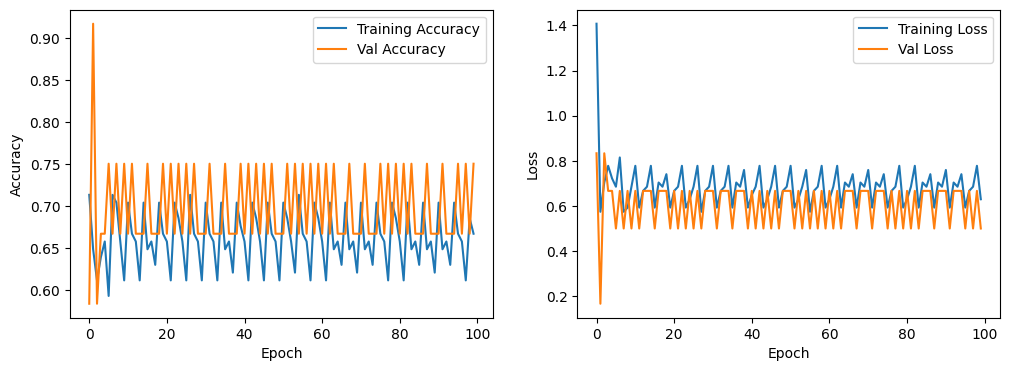

In [86]:
# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history["train_acc"], label='Training Accuracy')
plt.plot(history["val_acc"], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["train_loss"], label='Training Loss')
plt.plot(history["val_loss"], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Visualizing Decision Boundary of the Trained Model
In this code, we create a visualization to display the decision boundary of a trained Adaline model for binary classification. The goal is to distinguish the "Versicolour" class (class 1) from other combined classes.

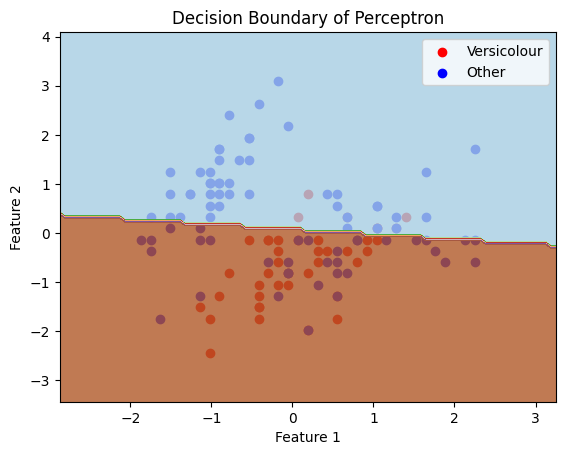

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Scatter plot for Setosa (class 0)
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], label='Versicolour', c='red')

# Scatter plot for Versicolor and Virginica (class 1 and 2)
plt.scatter(X_train[Y_train != 1][:, 0], X_train[Y_train != 1][:, 1], label='Other', c='blue')

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100))

# Use the trained Perceptron model to predict
Z = adaline.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Contour plot to show the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary of Perceptron')
plt.show()

#2-2. Madaline


In this code, we generate a synthetic dataset with moon-shaped clusters using the make_moons function from scikit-learn. The dataset is created with 500 samples and a noise level of 0.1 to introduce some variability. The dataset is then split into training and testing sets.

The code further performs the following visualizations:

Scatter Plot for Class 0: Data points belonging to "Class 0" in the moon-shaped dataset are plotted in red. These points represent one of the moon-shaped clusters.

Scatter Plot for Class 1: Data points belonging to "Class 1" are plotted in blue, representing the second moon-shaped cluster.

Axis Labels: Labels for "Feature 1" and "Feature 2" are added to the x and y axes to indicate the features being visualized.

Legend: A legend is included to distinguish between the two classes ("Class 0" and "Class 1").

Title: The title "Moon-shaped Dataset" provides context for the plot, indicating that the dataset consists of moon-shaped clusters.

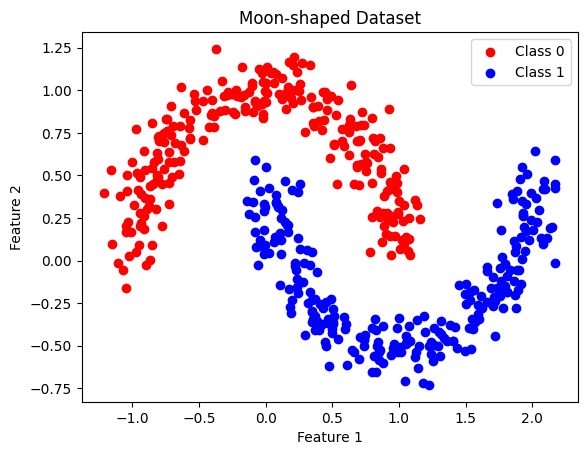

In [54]:
X_moons, Y_moons = make_moons(n_samples=500, noise=0.1, random_state=42)
Y_moons = np.where(Y_moons == 0, -1, 1)
X_train_moons, X_test_moons, Y_train_moons, Y_test_moons = train_test_split(X_moons,
Y_moons, test_size=0.5, random_state=3)
plt.scatter(X_moons[Y_moons == -1][:, 0], X_moons[Y_moons == -1][:, 1], color='red',
label='Class 0')
plt.scatter(X_moons[Y_moons == 1][:, 0], X_moons[Y_moons == 1][:, 1], color='blue',
label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Moon-shaped Dataset")
plt.show()

### Madeline Class
The provided code defines a class called "Madeline," which is used to implement a Madaline network for binary classification. A Madaline network is a type of neural network that consists of an input layer, a hidden layer, and an output layer, with threshold activation functions. Here's a breakdown of the code:

Activation Function:

The code defines an activation function named actv_func. This function applies a threshold to its input, returning 1 for input values greater than or equal to 0 and -1 for input values less than 0.
Class Initialization:

The __init__ method is the class constructor, which initializes various attributes of the Madeline model.
The weights1 attribute represents the weights of the connections between the input layer and the hidden layer.
The biases1 attribute represents the biases for the hidden layer.
The weights2 attribute represents the weights of the connections between the hidden layer and the output layer.
The biases2 attribute represents the bias for the output layer.
The learning rate (lr) and a history dictionary (history) for tracking training history are also initialized.
Model Training (fit method):

The fit method trains the Madeline model using the provided input data x, target labels t, the number of training epochs, learning rate lr, and an error function error_func.
The Madeline network consists of n hidden neurons, which is set to 3.
The method initializes weights and biases for both the hidden and output layers.
It employs the Madaline algorithm for training, which involves updating the weights and biases to minimize the error.
The algorithm iterates for a specified number of epochs, updating parameters to learn from the data.
The accuracy is calculated at each epoch using an imported function, and the best accuracy achieved during training is recorded.
Prediction (predict method):

The predict method takes input data x and uses the trained Madeline model to make predictions.
It computes the output of the network by applying the activation function to the weighted inputs for both the hidden and output layers.
The predictions are returned as binary values (1 or -1).
Evaluation (evaluate method):

The evaluate method is a placeholder, and its functionality is not implemented in the provided code. You can implement this method to evaluate the model's performance on new data.

In [55]:
def actv_func(x):
    return np.where(x >= 0, 1, -1)
from sklearn.metrics import accuracy_score
class Madeline():
  def __init__(self,input_size,hidden_size):
    self.weights1 = np.random.rand(input_size, hidden_size)  # Weights for the input to hidden layer
    self.biases1 = np.zeros((1, hidden_size))
    self.weights2 = np.random.rand(hidden_size, 1)  # Weights for the hidden to output layer
    self.biases2 = np.zeros((1, 1))
    self.lr = None
    self.hidden_size=hidden_size
    self.history={"train_acc":[],"train_loss":[],"val_acc":[],"val_loss":[]}
  def fit(self, x, t, epochs, lr, error_func, val_split=0.1):
    # Setting the parameter n as the number of hidden neurons
    n = self.hidden_size
    # Defining parameters related to the hidden layer
    self.biases1 = np.random.random([1, n])
    self.z = np.zeros([1, n])
    self.weights1 = np.random.random([2, n])
    # Defining parameters related to the output layer
    self.weights2 = np.ones([n, 1])
    self.biases2 = np.array([n - 1])
    # Defining parameters related to the network
    index = list(range(len(t)))
    epoch = 0
    alpha = 0.1
    accuracy = 0
    history=[]
    # Implementing the Madaline algorithm
    while (epoch < epochs):
        np.random.shuffle(index)
        # Updating the weights and bias
        for i in index:
            # Calculating the input of hidden neurons
            netZ = np.matmul(x[i, :], self.weights1) + self.biases1
            for j in range(n):
                # Obtaining the output of hidden neurons
                self.z[0][j] = actv_func(netZ[0][j])
            # Achieving the input and output of Y neuron
            netY = np.dot(self.z, self.weights2) + self.biases2
            Y = actv_func(netY)
            # Updating parameters based on the given rules
            if (Y != t[i]):
                if t[i] == 1:
                    # Only update weights on Z (closest to zero)
                    k = np.argmax(netZ[0])
                    self.biases1[0][k] = self.biases1[0][k] + alpha * (1 - netZ[0][k])
                    self.weights1[:, k] = self.weights1[:, k] + alpha * x[i, :] * (1 - netZ[0][k])
                else:
                    # Update weights on all units (with positive inputs)
                    for j in range(n):
                        if (netZ[0][j] > 0):
                            self.biases1[0][j] = self.biases1[0][j] + alpha * (-1 - netZ[0][j])
                            self.weights1[:, j] = self.weights1[:, j] + alpha * x[i, :] * (-1 - netZ[0][j])
        # Increasing the number of epochs
        epoch += 1
        y = []
        # Creating the y array for achieving the accuracy
        for e in x:
            netZ = np.array([np.matmul(e, self.weights1)]) + self.biases1
            Z = np.heaviside(netZ, 1) * 2 - 1
            netY = np.dot(np.squeeze(Z), np.squeeze(self.weights2)) + self.biases2
            y.append(np.heaviside(netY, 1) * 2 - 1)
        # Calculating the accuracy with an imported function
        acc = accuracy_score(y, t)
        # If condition for achieving the maximum accuracy
        if (acc > accuracy):
            accuracy = acc
            Epoch = epoch
    return accuracy
  def predict(self,x):
    netZ = np.matmul(x, self.weights1) + self.biases1
    z = actv_func(netZ)
    netY = np.dot(z, self.weights2) + self.biases2
    Y = actv_func(netY)
    return Y

# B & C
### Training and Visualization of Madaline with Confusion Matrices

This code cell demonstrates the training and evaluation of a Madaline neural network with a specific number of hidden neurons. The Madaline model is trained on a dataset and its performance is evaluated using confusion matrices. Let's break down the key components of this code:

Initialization and Training:

The code begins by importing the necessary Python libraries, including NumPy for numerical operations, scikit-learn for confusion matrix computation, and Matplotlib for visualization.
It defines the number of training epochs, learning rate, and the number of hidden neurons for the Madaline model.
The Madaline model is initialized with two input features and the specified number of hidden neurons.
The model is trained on the provided training data (X_train_moons and Y_train_moons) using the specified number of epochs and learning rate. The training accuracy is calculated and printed to the console.
Visualization of Decision Boundary:

Following the training, a scatter plot is created to visualize the training data. The data is separated into two classes, "Setosa" (class 0) and "Versicolor and Virginica" (class 1 and 2), represented by different colors in the plot.
A mesh grid is generated to plot the decision boundary. The trained Madaline model is used to predict class labels for various points on the grid, creating a decision boundary.
Display of Decision Boundary:

The code then plots the decision boundary using a contour plot. The boundary is displayed in different shades to represent the classification regions.
Additionally, lines representing the decision boundaries for each of the hidden neurons are overlaid on the plot. These lines provide insights into the model's decision-making process.
Confusion Matrices:

Two confusion matrices are generated and displayed side by side. One is for the test data, and the other is for the training data. These matrices help assess the model's classification performance by comparing predicted and actual class labels.
Overall Visualization:

The visual components are arranged within a Jupyter Notebook cell, resulting in a comprehensive view of the model's decision boundary and its performance evaluation using confusion matrices.

Train accuracy:  0.892


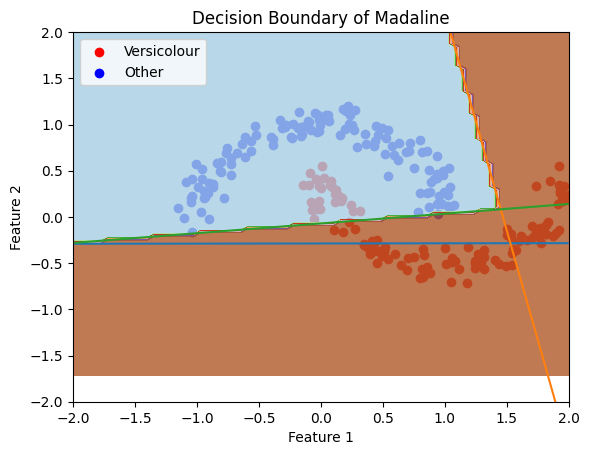

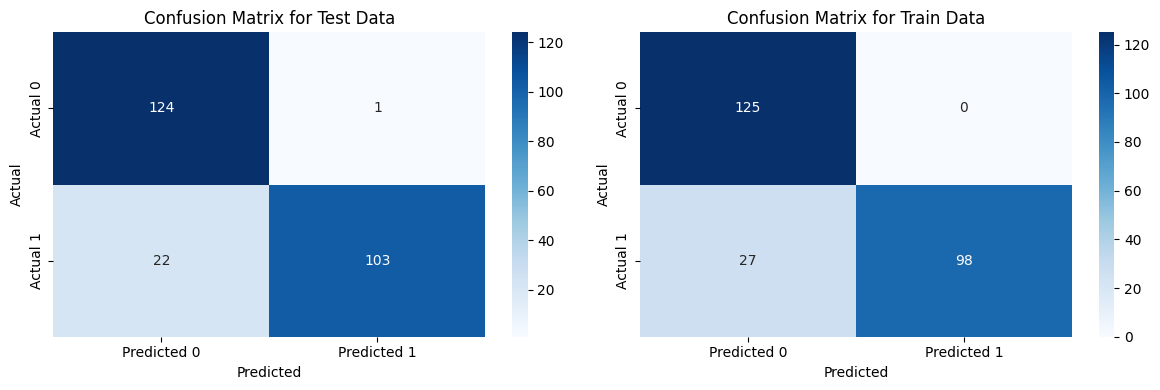

In [62]:
# Train the Adaline model
epochs = 10
learning_rate = 0.01
hidden_neurons=3
made=Madeline(2, hidden_neurons)
accuracy=made.fit(X_train_moons, Y_train_moons, epochs, learning_rate, error_func=mean_squared_error)
#printing the epochs and accuracy
print("Train accuracy: ",accuracy)



# Scatter plot for Setosa (class 0)
plt.scatter(X_train_moons[Y_train_moons == 1][:, 0], X_train_moons[Y_train_moons == 1][:, 1], label='Versicolour', c='red')

# Scatter plot for Versicolor and Virginica (class 1 and 2)
plt.scatter(X_train_moons[Y_train_moons != 1][:, 0], X_train_moons[Y_train_moons != 1][:, 1], label='Other', c='blue')

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_moons[:, 0].min() - 1, X_train_moons[:, 0].max() + 1, 100),
                     np.linspace(X_train_moons[:, 1].min() - 1, X_train_moons[:, 1].max() + 1, 100))

# Use the trained Perceptron model to predict
Z = made.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Contour plot to show the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
u = np.arange(-2, 2, 0.01)
for j in range(hidden_neurons):
  q=0
  q = -made.weights1[0][j]*u/made.weights1[1][j] - made.biases1[0][j]/made.weights1[1][j]
  plt.plot(u,q)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.title('Decision Boundary of Madaline')
plt.show()

predicted_test=made.predict(X_test_moons)
cm = confusion_matrix(Y_test_moons, predicted_test)

# Plot the confusion matrix using seaborn
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Test data confusion matrix
predicted_test = made.predict(X_test_moons)
cm_test = confusion_matrix(Y_test_moons, predicted_test)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axs[0])
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")
axs[0].set_title("Confusion Matrix for Test Data")

# Train data confusion matrix
predicted_train = made.predict(X_train_moons)
cm_train = confusion_matrix(Y_train_moons, predicted_train)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axs[1])
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")
axs[1].set_title("Confusion Matrix for Train Data")

# Adjust the space between subplots
plt.tight_layout()

# Display the combined plots
plt.show()

### Nuerons=5

Train accuracy:  0.892


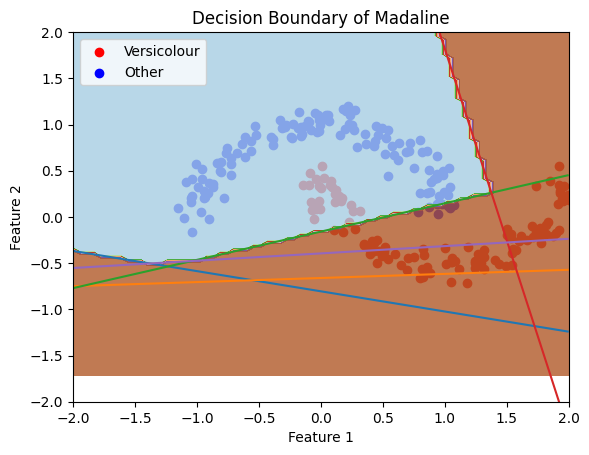

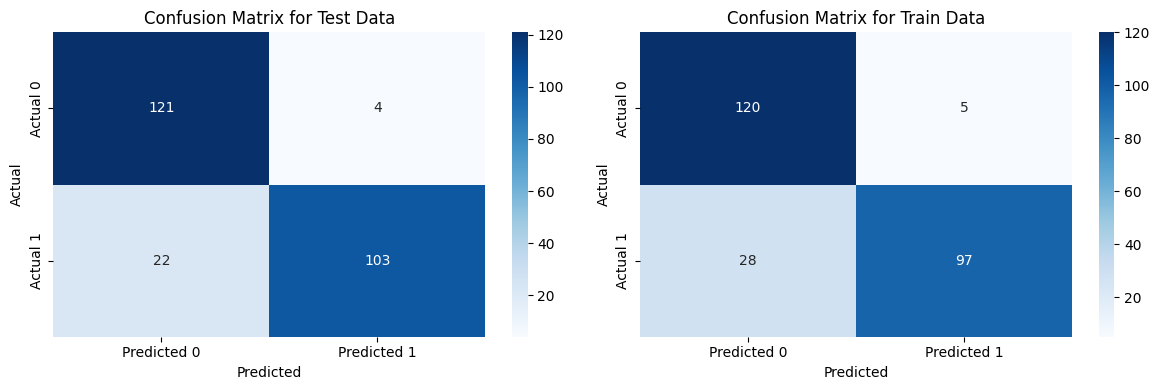

In [63]:
# Train the Adaline model
epochs = 100
learning_rate = 0.01
hidden_neurons=5
made=Madeline(2, hidden_neurons)
accuracy=made.fit(X_train_moons, Y_train_moons, epochs, learning_rate, error_func=mean_squared_error)
#printing the epochs and accuracy
print("Train accuracy: ",accuracy)


# Scatter plot for Setosa (class 0)
plt.scatter(X_train_moons[Y_train_moons == 1][:, 0], X_train_moons[Y_train_moons == 1][:, 1], label='Versicolour', c='red')

# Scatter plot for Versicolor and Virginica (class 1 and 2)
plt.scatter(X_train_moons[Y_train_moons != 1][:, 0], X_train_moons[Y_train_moons != 1][:, 1], label='Other', c='blue')

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_moons[:, 0].min() - 1, X_train_moons[:, 0].max() + 1, 100),
                     np.linspace(X_train_moons[:, 1].min() - 1, X_train_moons[:, 1].max() + 1, 100))

# Use the trained Perceptron model to predict
Z = made.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Contour plot to show the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
u = np.arange(-2, 2, 0.01)
for j in range(hidden_neurons):
  q=0
  q = -made.weights1[0][j]*u/made.weights1[1][j] - made.biases1[0][j]/made.weights1[1][j]
  plt.plot(u,q)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.title('Decision Boundary of Madaline')
plt.show()

predicted_test=made.predict(X_test_moons)
cm = confusion_matrix(Y_test_moons, predicted_test)

# Plot the confusion matrix using seaborn
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Test data confusion matrix
predicted_test = made.predict(X_test_moons)
cm_test = confusion_matrix(Y_test_moons, predicted_test)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axs[0])
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")
axs[0].set_title("Confusion Matrix for Test Data")

# Train data confusion matrix
predicted_train = made.predict(X_train_moons)
cm_train = confusion_matrix(Y_train_moons, predicted_train)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axs[1])
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")
axs[1].set_title("Confusion Matrix for Train Data")

# Adjust the space between subplots
plt.tight_layout()

# Display the combined plots
plt.show()

### Nuerons=8

Train accuracy:  0.892


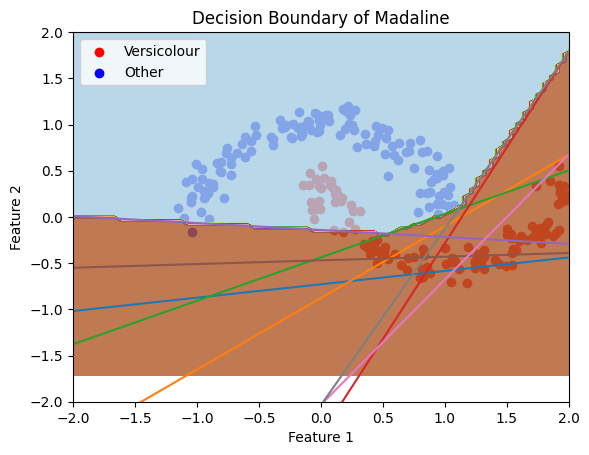

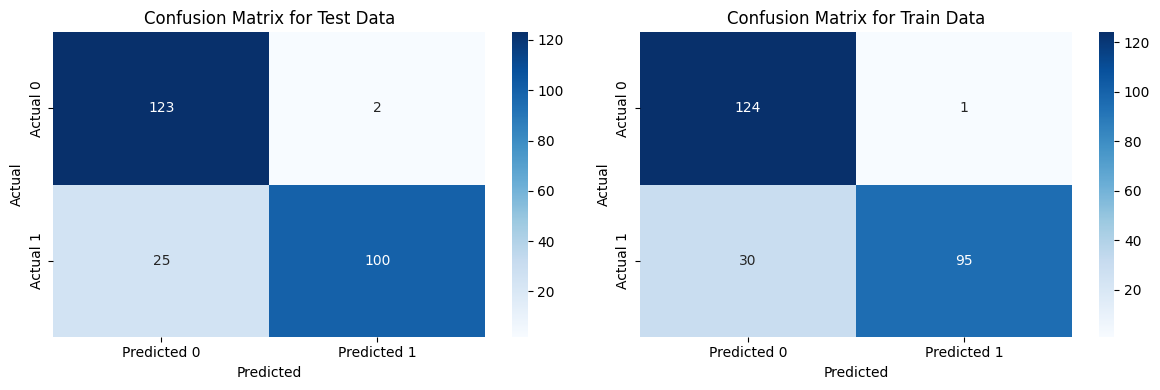

In [64]:
# Train the Adaline model
epochs = 100
learning_rate = 0.01
hidden_neurons=8
made=Madeline(2, hidden_neurons)
accuracy=made.fit(X_train_moons, Y_train_moons, epochs, learning_rate, error_func=mean_squared_error)
#printing the epochs and accuracy
print("Train accuracy: ",accuracy)


# Scatter plot for Setosa (class 0)
plt.scatter(X_train_moons[Y_train_moons == 1][:, 0], X_train_moons[Y_train_moons == 1][:, 1], label='Versicolour', c='red')

# Scatter plot for Versicolor and Virginica (class 1 and 2)
plt.scatter(X_train_moons[Y_train_moons != 1][:, 0], X_train_moons[Y_train_moons != 1][:, 1], label='Other', c='blue')

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_moons[:, 0].min() - 1, X_train_moons[:, 0].max() + 1, 100),
                     np.linspace(X_train_moons[:, 1].min() - 1, X_train_moons[:, 1].max() + 1, 100))

# Use the trained Perceptron model to predict
Z = made.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Contour plot to show the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
u = np.arange(-2, 2, 0.01)
for j in range(hidden_neurons):
  q=0
  q = -made.weights1[0][j]*u/made.weights1[1][j] - made.biases1[0][j]/made.weights1[1][j]
  plt.plot(u,q)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.title('Decision Boundary of Madaline')
plt.show()

predicted_test=made.predict(X_test_moons)
cm = confusion_matrix(Y_test_moons, predicted_test)

# Plot the confusion matrix using seaborn
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Test data confusion matrix
predicted_test = made.predict(X_test_moons)
cm_test = confusion_matrix(Y_test_moons, predicted_test)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axs[0])
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")
axs[0].set_title("Confusion Matrix for Test Data")

# Train data confusion matrix
predicted_train = made.predict(X_train_moons)
cm_train = confusion_matrix(Y_train_moons, predicted_train)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axs[1])
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")
axs[1].set_title("Confusion Matrix for Train Data")

# Adjust the space between subplots
plt.tight_layout()

# Display the combined plots
plt.show()